# Data Exploration and Analysis   
IF4041 - Data Science & Data Mining assignment: Fraud Detection.  
By  
13516015 [Michelle Eliza Gananjaya](github.com/)  
13516030 [Yonas Adiel Wiguna](github.com/)  
13516101 [Kelvin Kristian](github.com/)  
13516140 [Ilham Firdausi Putra](github.com/ilhamfp)  


# Load Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

DIR_DATA_RAW = '../data/raw'
DIR_DATA_INTERIM = '../data/interim'

In [2]:
def get_filepaths(directory):
    """
    This function will generate the file names in a directory 
    tree by walking the tree either top-down or bottom-up. For each 
    directory in the tree rooted at directory top (including top itself), 
    it yields a 3-tuple (dirpath, dirnames, filenames).
    """
    file_paths = []  # List which will store all of the full filepaths.

    # Walk the tree.
    for root, directories, files in os.walk(directory):
        for filename in files:
            # Join the two strings in order to form the full filepath.
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)  # Add it to the list.

    return file_paths  # Self-explanatory.

def load_data(DIR_DATA_RAW):
    """Load data and label from the given directory path
    
    **Args**:
    * DIR_DATA_RAW (string): Path to the raw directory
    
    **Return**:
    * data (dataframe) 
    * label (dataframe)
    """
    file_paths = get_filepaths(DIR_DATA_RAW)
    file_paths = [path for path in file_paths if (path.endswith("Inputs") or path.endswith("Targets"))]
    file_paths.sort()
    
    print("Loading data from: ")
    for x in file_paths[:4]:
        print(x)
        
    data = pd.DataFrame()
    label = pd.DataFrame()

    for i in range(0, len(file_paths[:4]), 2):
        cur_data = pd.read_csv(file_paths[i])
        cur_label = pd.read_csv(file_paths[i+1], header=None)

        data = pd.concat([data, cur_data])
        label = pd.concat([label, cur_label])
        
    label.columns = ['label']
    return data, label

In [3]:
data, label = load_data(DIR_DATA_RAW)

Loading data from: 
../data/raw/DataminingContest2009.Task1.CV1.Test.Inputs
../data/raw/DataminingContest2009.Task1.CV1.Test.Targets
../data/raw/DataminingContest2009.Task1.CV1.Train.Inputs
../data/raw/DataminingContest2009.Task1.CV1.Train.Targets


In [4]:
print(data.shape)
data.head()

(94682, 19)


,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,25.90,0,FL,331,3,BELLSOUTH.NET,1,0,1,25.90,3878,8,0,0,0,0,1,0,1
1,38.85,0,TX,750,2,COMCAST.NET,1,0,0,38.85,-6330,21,1,0,0,1,1,0,1
2,38.85,1,VA,222,2,HOTMAIL.COM,0,1,0,38.85,5183,19,1,0,0,0,0,0,1
3,24.95,1,CA,946,0,GMAIL.COM,0,1,0,24.95,3822,16,0,0,0,0,0,0,1
4,20.72,1,CO,805,3,LEVEL3.COM,0,1,1,20.72,3536,8,1,0,0,1,1,0,1


In [5]:
print(label.shape)
label.tail()

(94682, 1)


,label
85208,0
85209,0
85210,1
85211,1
85212,1


# Check Data Type

In [6]:
data.dtypes

amount        float64
hour1           int64
state1         object
zip1            int64
field1          int64
domain1        object
field2          int64
hour2           int64
flag1           int64
total         float64
field3          int64
field4          int64
field5          int64
indicator1      int64
indicator2      int64
flag2           int64
flag3           int64
flag4           int64
flag5           int64
dtype: object

# Check Null Values

In [7]:
data.isnull().sum()

amount        0
hour1         0
state1        0
zip1          0
field1        0
domain1       1
field2        0
hour2         0
flag1         0
total         0
field3        0
field4        0
field5        0
indicator1    0
indicator2    0
flag2         0
flag3         0
flag4         0
flag5         0
dtype: int64

# Check Numerical Values

In [8]:
data.describe()

,amount,hour1,zip1,field1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
count,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000
mean,25.635312,13.864726,543.243742,2.419203,0.425561,13.875858,0.546989,25.626179,714.512653,13.984115,1.375689,0.113306,0.018367,0.541127,0.401185,0.019888,6.176676
std,14.190485,5.263233,315.373801,1.003760,0.494430,5.258338,0.497790,14.198761,3919.325076,6.516851,2.423941,0.316968,0.134274,0.498308,0.490141,0.139615,102.977443
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32265.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.950000,10.000000,282.000000,2.000000,0.000000,11.000000,0.000000,12.950000,-1551.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,25.900000,14.000000,530.000000,3.000000,0.000000,14.000000,1.000000,25.900000,1455.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,38.850000,18.000000,891.000000,3.000000,1.000000,18.000000,1.000000,38.850000,3598.000000,19.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,95.400000,23.000000,999.000000,4.000000,1.000000,23.000000,1.000000,95.400000,8193.000000,46.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3278.000000


# Check Non-Numeric Value

In [9]:
print("Num state1 unique value:", data["state1"].nunique())
print("Num domain1 unique value:", data["domain1"].nunique())

Num state1 unique value: 53
Num domain1 unique value: 9809


# Check Target Variable Distribution

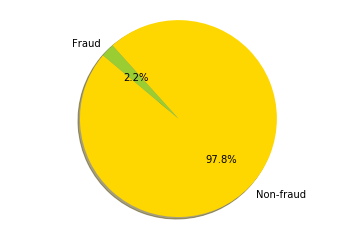

In [10]:
labels = 'Non-fraud', 'Fraud'
count = label.label.value_counts()
sizes = [count[0], count[1]]
colors = ['gold', 'yellowgreen']

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()